<a href="https://colab.research.google.com/github/JamalMorales/PDI/blob/main/PR%C3%81CTICAS%20PDI/Pr%C3%A1ctica_3_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargamos la libreria de Github para tener acceso a nuestras imagenes primero**

In [15]:
!git clone https://github.com/JamalMorales/PDI.git
%cd PDI
!ls -R

Cloning into 'PDI'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 1.34 MiB | 5.95 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/PDI/PDI/PDI/PDI/PDI
.:
 IMAGENES  'PRÁCTICAS PDI'   README.md

./IMAGENES:
contraste.jpg  flor.jpg  frutas.jpg  medica.jpg

'./PRÁCTICAS PDI':
Hola  Práctica_4_PDI.ipynb


# **Despues cargamos nuestro codigo correspondiente**

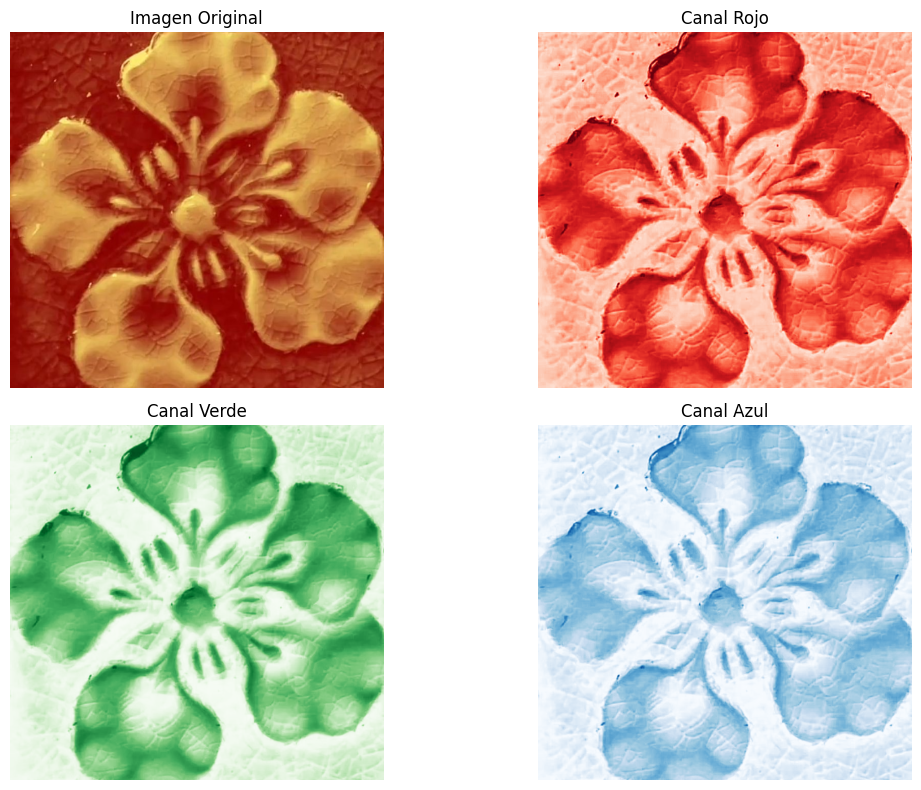

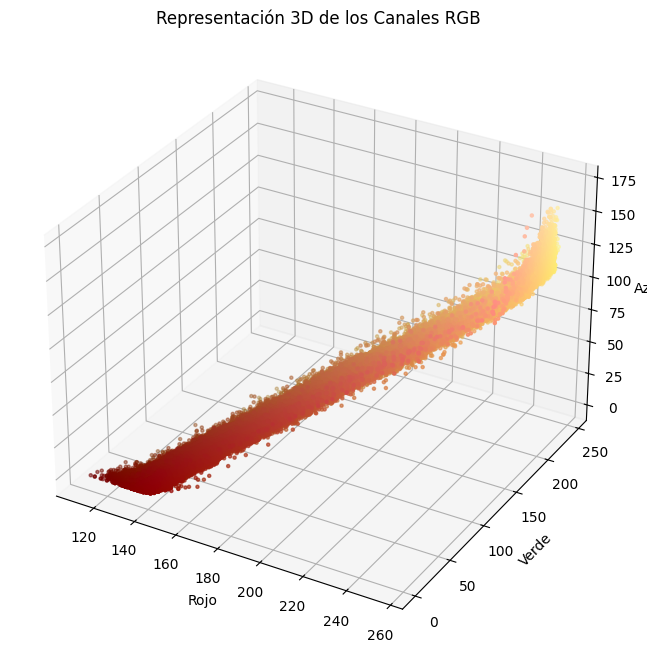

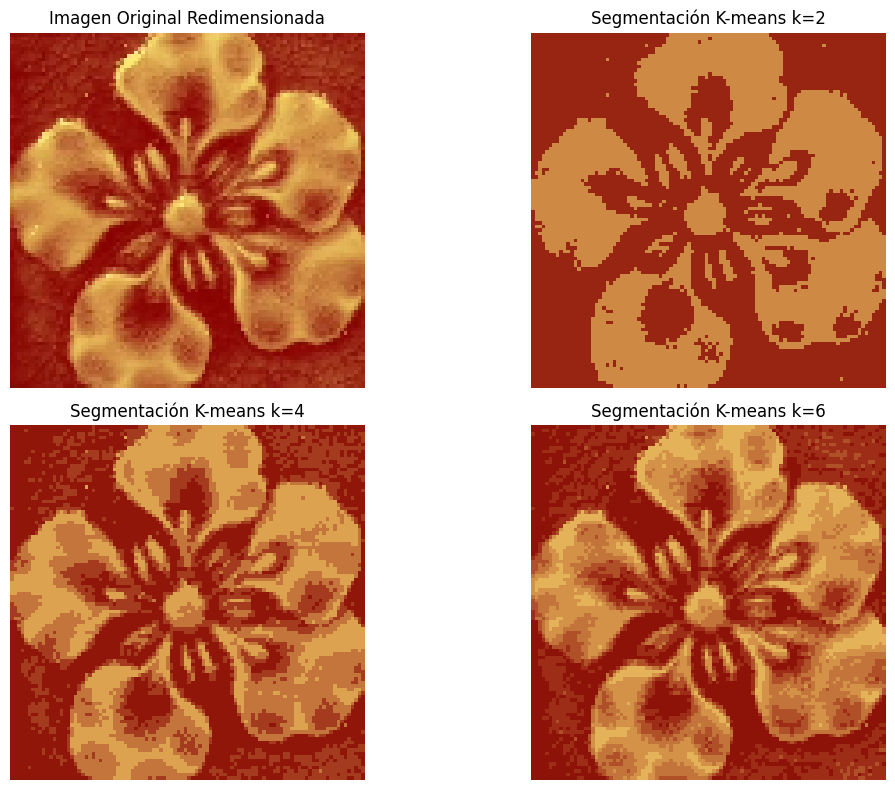

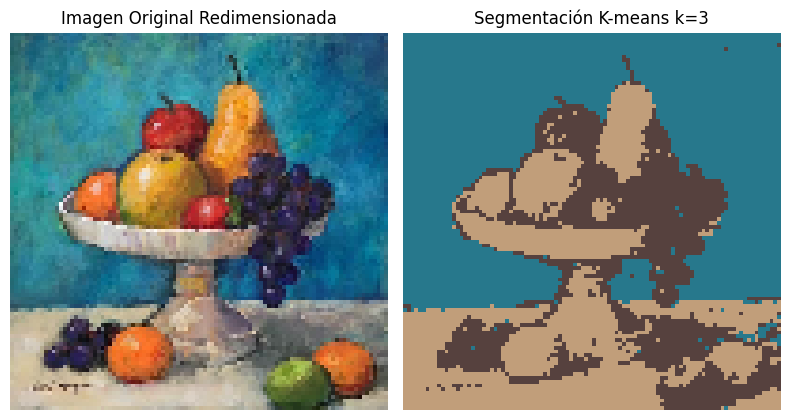

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Autores:
# Jamal Morales Sánchez 2064497
# Evelyn Rubí Martinez Ruiz 2071292
# Abigail Montserrat Nieto Solís 2059067
# Reynaldo Holsen Gallegos González 1963727
# Jesús Antonio Segura Vences 1851396

# -------------------------------
# Ejercicio 1: Representación RGB
# -------------------------------

# Cargar imagen en color (ruta dentro del repo clonado)
img_color = cv2.imread('IMAGENES/flor.jpg')
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Extraer los colores RGB de todos los píxeles

pixels = img_rgb.reshape(-1, 3)
pixels_f = pixels.astype(float) / 255.0

r = pixels_f[:, 0]
g = pixels_f[:, 1]
b = pixels_f[:, 2]

# Mostrar canales RGB por separado e imagen original

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_rgb[:, :, 0], cmap='Reds')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_rgb[:, :, 1], cmap='Greens')
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_rgb[:, :, 2], cmap='Blues')
plt.title('Canal Azul')
plt.axis('off')
plt.tight_layout()

plt.show()

# Represemtacion 3D de los canales RGB

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

r, g, b = img_rgb[:,:,0].flatten(), img_rgb[:,:,1].flatten(), img_rgb[:,:,2].flatten()
ax.scatter(r, g, b, c=img_rgb.reshape(-1, 3)/255.0, marker='.')
ax.set_xlabel('Rojo')
ax.set_ylabel('Verde')
ax.set_zlabel('Azul')

plt.title('Representación 3D de los Canales RGB')

plt.show()

# -------------------------------
# Ejercicio 2: Segmentación K-means
# -------------------------------

# Redimensionar la imagen para el clustering

img_small = cv2.resize(img_rgb, (100, 100))

# Convertir la imagen a un arreglo de píxeles RGB

pixel_values = img_small.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Aplicar k-means clustering con k=2

k2 = 2

kmeans1 = KMeans(n_clusters=k2, random_state=42)
kmeans1.fit(pixel_values)
labels1 = kmeans1.labels_
centers1 = kmeans1.cluster_centers_

# Crear imagen segmentada para k=2

segmented_data1 = centers1[labels1.flatten()]
img_cluster1 = segmented_data1.reshape(img_small.shape)

# Aplicar k-means clustering con k=4

k4 = 4

kmeans2 = KMeans(n_clusters=k4, random_state=42)
kmeans2.fit(pixel_values)
labels2 = kmeans2.labels_
centers2 = kmeans2.cluster_centers_

# Crear imagen segmentada para k=4

segmented_data2 = centers2[labels2.flatten()]
img_cluster2 = segmented_data2.reshape(img_small.shape)

# Aplicar k-means clustering con k=6

k6 = 6

kmeans3 = KMeans(n_clusters=k6, random_state=42)
kmeans3.fit(pixel_values)
labels3 = kmeans3.labels_
centers3 = kmeans3.cluster_centers_

# Crear imagen segmentada para k=6
segmented_data3 = centers3[labels3.flatten()]
img_cluster3 = segmented_data3.reshape(img_small.shape)

# Mostrar imágenes originales y segmentadas

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_small)
plt.title('Imagen Original Redimensionada')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_cluster1.astype(np.uint8))
plt.title('Segmentación K-means k=2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_cluster2.astype(np.uint8))
plt.title('Segmentación K-means k=4')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_cluster3.astype(np.uint8))
plt.title('Segmentación K-means k=6')
plt.axis('off')

plt.tight_layout()
plt.show()

# -------------------------------
# Ejercicio 3: Aplicación práctica
# -------------------------------

# Cargar imagen en color (ruta dentro del repo clonado)
img_practical = cv2.imread('IMAGENES/frutas.jpg')
img_practical_rgb = cv2.cvtColor(img_practical, cv2.COLOR_BGR2RGB)

# Redimensionar la imagen para el clustering

img_practical_small = cv2.resize(img_practical_rgb, (100, 100))

# Convertir la imagen a un arreglo de píxeles RGB

pixel_values_practical = img_practical_small.reshape((-1, 3))
pixel_values_practical = np.float32(pixel_values_practical)

# Aplicar k-means clustering con k=3

k3 = 3

kmeans_practical = KMeans(n_clusters=k3, random_state=42)
kmeans_practical.fit(pixel_values_practical)
labels_practical = kmeans_practical.labels_
centers_practical = kmeans_practical.cluster_centers_

# Crear imagen segmentada para k=3

segmented_data_practical = centers_practical[labels_practical.flatten()]
img_cluster_practical = segmented_data_practical.reshape(img_practical_small.shape)

# Mostrar imágenes originales y segmentadas

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_practical_small)
plt.title('Imagen Original Redimensionada')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_cluster_practical.astype(np.uint8))
plt.title('Segmentación K-means k=3')
plt.axis('off')

plt.tight_layout()
plt.show()
